<a href="https://colab.research.google.com/github/ipark3/Hank-Ian/blob/main/GitHub%20Project/dataset/code/evalute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive

Bootstrap Results:
Mean MSE: 15475918424.18
Standard Deviation of MSE: 38695387.90

Original Model Performance:
Mean Squared Error (MSE): 15461051690.40


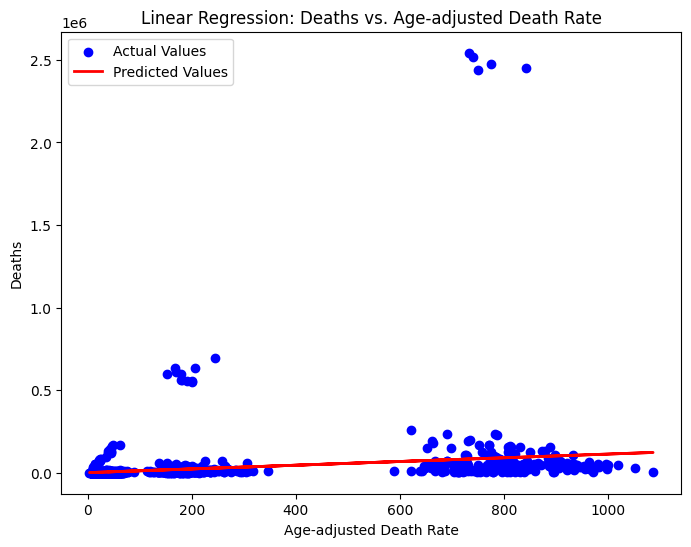

In [26]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
file_path = '/content/drive/MyDrive/Personal/NCHS_-_Leading_Causes_of_Death__United_States.csv'
df = pd.read_csv(file_path)

# Strip any extra whitespace from column names
df.columns = df.columns.str.strip()

# Filter relevant columns and drop missing values
filtered_df = df[['Age-adjusted Death Rate', 'Deaths']].replace('..', np.nan).dropna()
filtered_df = filtered_df.infer_objects(copy=False).astype(float)  # Ensure correct types

# Define predictor and target variables
X = filtered_df[['Age-adjusted Death Rate']]
y = filtered_df['Deaths']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Bootstrap Method
n_bootstraps = 1000  # Number of bootstrap samples
bootstrap_mses = []

for i in range(n_bootstraps):
    # Resample the training data
    boot_indices = np.random.choice(range(len(X_train)), size=len(X_train), replace=True)
    X_boot = X_train.iloc[boot_indices]
    y_boot = y_train.iloc[boot_indices]

    # Fit the model on the bootstrap sample
    model.fit(X_boot, y_boot)

    # Predict on the test set
    y_pred_boot = model.predict(X_test)

    # Calculate MSE for the bootstrap sample
    mse_boot = mean_squared_error(y_test, y_pred_boot)
    bootstrap_mses.append(mse_boot)

# Calculate mean and standard deviation of the bootstrap errors
bootstrap_mean_mse = np.mean(bootstrap_mses)
bootstrap_std_mse = np.std(bootstrap_mses)

# Print results
print("\nBootstrap Results:")
print(f"Mean MSE: {bootstrap_mean_mse:.2f}")
print(f"Standard Deviation of MSE: {bootstrap_std_mse:.2f}")

# Original Model Performance
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("\nOriginal Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Plot regression results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.plot(X_test, y_pred, color='red', label='Predicted Values', linewidth=2)
plt.xlabel('Age-adjusted Death Rate')
plt.ylabel('Deaths')
plt.title('Linear Regression: Deaths vs. Age-adjusted Death Rate')
plt.legend()
plt.show()

The Bootstrap Standard Deviation helps to show that the model performance is stable and constistant.

Mounted at /content/drive
Simple Train-Test Split:
Mean Squared Error (MSE): 10.21
Mean Absolute Error (MAE): 2.01
R^2 Score: 0.95

Cross-Validation (5-Fold):
Cross-Validation Mean MSE: -8.72
Cross-Validation Std MSE: 3.61
Cross-Validation Mean MAE: -1.76
Cross-Validation Std MAE: 0.41
Cross-Validation Mean R^2: 0.96
Cross-Validation Std R^2: 0.01


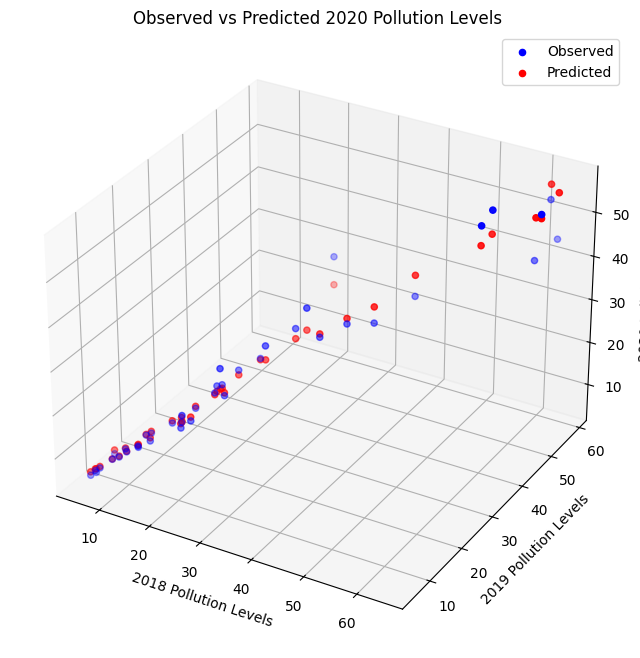

In [27]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
import numpy as np

# Load the dataset
file_path = '/content/drive/MyDrive/Personal/P_Data_Extract_From_World_Development_Indicators.xlsx'
df = pd.read_excel(file_path)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Select columns for features and target, replacing missing values
selected_columns = ['2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]']
clean_data = df[selected_columns].replace('..', np.nan).dropna()
clean_data = clean_data.infer_objects(copy=False).astype(float)  # Ensure numeric data types

# Define features (X) and target variable (y)
X = clean_data[['2018 [YR2018]', '2019 [YR2019]']]
y = clean_data['2020 [YR2020]']

# Simple train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train and evaluate using train-test split
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_split = mean_squared_error(y_test, y_pred)
r2_split = r2_score(y_test, y_pred)
mae_split = mean_absolute_error(y_test, y_pred)

# Cross-validation using k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mses = -cross_val_score(model, X, y, cv=kf, scoring=make_scorer(mean_squared_error))
cv_r2s = cross_val_score(model, X, y, cv=kf, scoring='r2')
cv_maes = -cross_val_score(model, X, y, cv=kf, scoring=make_scorer(mean_absolute_error))

# Print results
print("Simple Train-Test Split:")
print(f"Mean Squared Error (MSE): {mse_split:.2f}")
print(f"Mean Absolute Error (MAE): {mae_split:.2f}")
print(f"R^2 Score: {r2_split:.2f}")

print("\nCross-Validation (5-Fold):")
print(f"Cross-Validation Mean MSE: {np.mean(cv_mses):.2f}")
print(f"Cross-Validation Std MSE: {np.std(cv_mses):.2f}")
print(f"Cross-Validation Mean MAE: {np.mean(cv_maes):.2f}")
print(f"Cross-Validation Std MAE: {np.std(cv_maes):.2f}")
print(f"Cross-Validation Mean R^2: {np.mean(cv_r2s):.2f}")
print(f"Cross-Validation Std R^2: {np.std(cv_r2s):.2f}")

# 3D Plot for observed vs predicted values
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for observed values
ax.scatter(X_test['2018 [YR2018]'], X_test['2019 [YR2019]'], y_test, color='blue', label='Observed')
# Scatter plot for predicted values
ax.scatter(X_test['2018 [YR2018]'], X_test['2019 [YR2019]'], y_pred, color='red', label='Predicted')

# Set plot labels and title
ax.set_xlabel('2018 Pollution Levels')
ax.set_ylabel('2019 Pollution Levels')
ax.set_zlabel('2020 Pollution Levels')
ax.set_title('Observed vs Predicted 2020 Pollution Levels')

# Add legend
ax.legend()

plt.show()


The low standard deviation of MSE, and MAE show that the model is consistant for data.

Mounted at /content/drive
Cross-Validation Results (Accuracy):
Model 1: Mean = 0.956, Std = 0.032
Model 2: Mean = 0.956, Std = 0.032
Model 3: Mean = 0.956, Std = 0.032
Model 4: Mean = 0.950, Std = 0.042

Selected Model: Model 1
Accuracy: 0.951
Log Loss: 0.111

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        22
         1.0       0.90      1.00      0.95        19

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.96      0.95      0.95        41



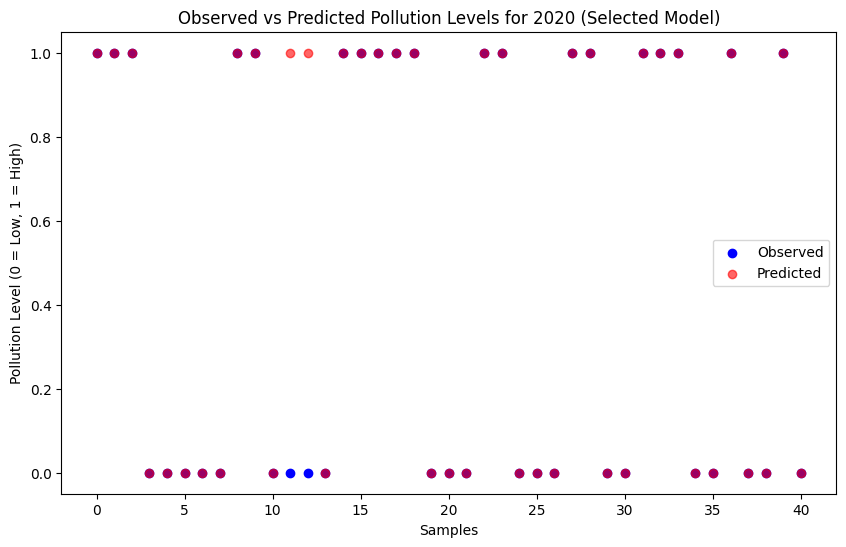

In [28]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
import numpy as np

# Load the dataset
file_path = '/content/drive/MyDrive/Personal/P_Data_Extract_From_World_Development_Indicators.xlsx'
df = pd.read_excel(file_path)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Set the future behavior to avoid warnings
pd.set_option('future.no_silent_downcasting', True)

# Set a threshold for binary classification on the "2020 [YR2020]" column
threshold_2020 = 20.0  # Define high pollution as values above 20.0
df['Pollution_Level_2020'] = (df['2020 [YR2020]'].replace('..', np.nan).astype(float) > threshold_2020).astype(int)

# Select relevant features and target variable
selected_columns = ['2018 [YR2018]', '2019 [YR2019]', 'Pollution_Level_2020']
cleaned_df = df[selected_columns].replace('..', np.nan).dropna()
cleaned_df = cleaned_df.infer_objects(copy=False).astype(float)  # Ensure correct data types

# Define features (X) and target variable (y)
X = cleaned_df[['2018 [YR2018]', '2019 [YR2019]']]
y = cleaned_df['Pollution_Level_2020']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize multiple logistic regression models with different hyperparameters
models = [
    LogisticRegression(C=0.01, max_iter=500),
    LogisticRegression(C=0.1, max_iter=500),
    LogisticRegression(C=1.0, max_iter=500),
    LogisticRegression(C=10.0, max_iter=500)
]

# Evaluate models using cross-validation and calculate mean and standard deviation of accuracy
cv_scores = []
cv_means = []
cv_stds = []
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores)
    cv_means.append(np.mean(scores))
    cv_stds.append(np.std(scores))

# Apply the one-standard-error method
best_mean = max(cv_means)
best_idx = cv_means.index(best_mean)
best_std = cv_stds[best_idx]

# Select the simplest model within one standard error of the best model
selected_model_idx = next(
    idx for idx, mean in enumerate(cv_means)
    if mean >= (best_mean - best_std)
)
selected_model = models[selected_model_idx]

# Train and evaluate the selected model
selected_model.fit(X_train, y_train)
y_pred = selected_model.predict(X_test)
y_pred_proba = selected_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)

# Print results
print("Cross-Validation Results (Accuracy):")
for i, (mean, std) in enumerate(zip(cv_means, cv_stds)):
    print(f"Model {i + 1}: Mean = {mean:.3f}, Std = {std:.3f}")

print(f"\nSelected Model: Model {selected_model_idx + 1}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Log Loss: {log_loss_value:.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Observed')
plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.6, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Pollution Level (0 = Low, 1 = High)')
plt.title('Observed vs Predicted Pollution Levels for 2020 (Selected Model)')
plt.legend()
plt.show()

Using the One-Standard-Error Method it is used for simplicity and allows for cocusing on simpler models.